In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
#Load dataset
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
digits['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

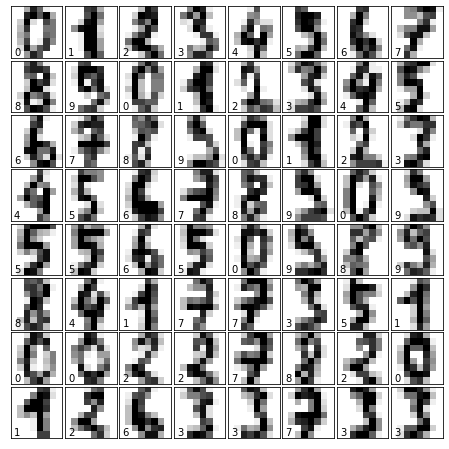

In [5]:
fig = plt.figure(figsize=(6, 6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

In [6]:
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=68)

# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

In [7]:

print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.8205841446453408


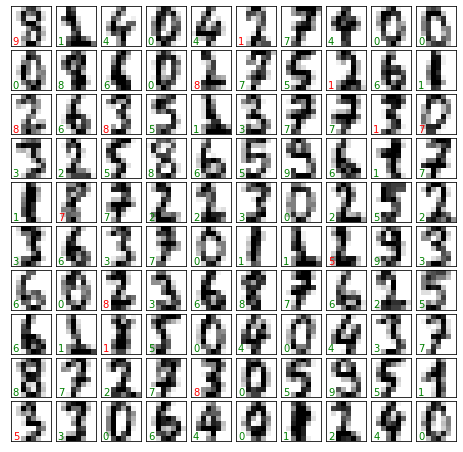

In [8]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = X_test.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(predicted[i]),
            transform=ax.transAxes,
            color='green' if (y_test[i] == predicted[i]) else 'red')   #green for correct labels and red for incorrect labels

With PCA

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)

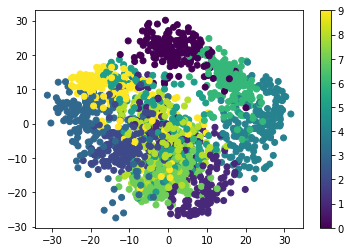

In [11]:
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target)
plt.colorbar();

In [12]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4)

c = GaussianNB()
c.fit(X_train, y_train)

predicted = c.predict(X_test)
expected = y_test

In [13]:
from sklearn import metrics
from pandas import DataFrame
DataFrame(metrics.classification_report(expected, predicted, output_dict=True)).T

,precision,recall,f1-score,support
0,1.000000,0.973684,0.986667,76.000000
1,0.802817,0.703704,0.750000,81.000000
2,0.906250,0.460317,0.610526,63.000000
3,0.825000,0.804878,0.814815,82.000000
4,0.983333,0.842857,0.907692,70.000000
5,0.892308,0.892308,0.892308,65.000000
6,0.969231,1.000000,0.984375,63.000000
7,0.802326,1.000000,0.890323,69.000000
8,0.460938,0.951613,0.621053,62.000000
9,0.931034,0.613636,0.739726,88.000000


In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predicted))

0.8178025034770514
